<div align='center'><font size="5" color='#353B47'>Survival Analysis</font></div>
<div align='center'><font size="4" color="#353B47">Cox Model implementation</font></div>
<br>
<hr>

In [11]:
# Import dependancies
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt

!pip install lifelines
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter

%matplotlib inline

# <div id="chap1">Data description</div>

* The haberman dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
* Age: Age of patient at time of operation 
* Operation_year: Patient's year of operation (year - 19XX)
* Nb_pos_detected: Number of positive axillary nodes detected
* Surv: Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

In [12]:
data = pd.read_csv('../input/habermans-survival-data-set/haberman.csv', names = ['Age','Operation_year','Nb_pos_detected','Surv'])
data.head(5)

,Age,Operation_year,Nb_pos_detected,Surv
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [13]:
#check is data contains missing or nan values
data.describe()

,Age,Operation_year,Nb_pos_detected,Surv
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### <font color ='#D2911C'>Survival Analysis</font>

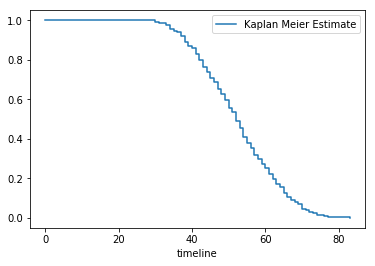

In [14]:
T = data.Age
E = data.Surv

## create a kmf object
km = KaplanMeierFitter() 

## Fit the data into the model
km.fit(T, E,label='Kaplan Meier Estimate')

## Create an estimate
km.plot(ci_show=False) ## ci_show is meant for Confidence interval, since our data set is too tiny, not showing it.



Survival gradually decreases after 30 years of age.

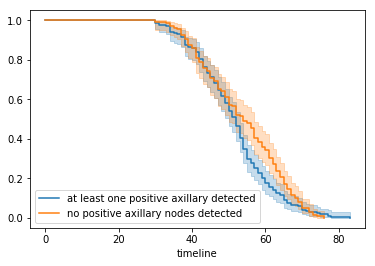

In [15]:
## Instantiate the class to create an object
km_2 = KaplanMeierFitter()

## creating 2 cohorts : with at least one positive axillary detected, and one with no one detected
groups = data['Nb_pos_detected']   
i1 = (groups >= 1)   
i2 = (groups < 1)     


## fit the model for 1st cohort
km_2.fit(T[i1], E[i1], label='at least one positive axillary detected')
a1 = km_2.plot()

## fit the model for 2nd cohort
km_2.fit(T[i2], E[i2], label='no positive axillary nodes detected')
km_2.plot(ax=a1)

In [16]:
from lifelines.statistics import logrank_test
results=logrank_test(T[i1],T[i2],event_observed_A=E[i1], event_observed_B=E[i2])
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
test_statistic    p  -log2(p)
          3.31 0.07      3.86

<div align='justify'><font size=3>There are two survival curves, one for each cohort. From the curves, it is evident that patients, who have undergone at least 1 surgery, are more likely to die sooner, though this is not statistically significant. Before 45 years old, the two curves are almost overlapped. At any point t>45 across the timeline, we can see that the survival probability of the cohort in blue is less than the cohort in orange.</font></div>

# <div id="chap3">Cox Proportional Hazards model</div>

In [17]:
# Create Model
cph = CoxPHFitter()

# Fit the data to train the model
cph.fit(data, 'Age', event_col='Surv')

# Have a look at the significance of the features
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 306 total observations, 0 right-censored observations>
             duration col = 'Age'
                event col = 'Surv'
      baseline estimation = breslow
   number of observations = 306
number of events observed = 306
   partial log-likelihood = -1446.95
         time fit was run = 2022-12-18 12:01:11 UTC

---
                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                               
Operation_year   -0.02       0.98       0.02            -0.06             0.01                 0.94                 1.01
Nb_pos_detected   0.01       1.01       0.01            -0.00             0.03                 1.00                 1.03

                    z    p   -log2(p)
covariate                            
Operation_year  -1.39 0.16       2.61
Nb_pos_detected  1.70 0.09       3.47
---
Concordance = 0.53
Partial AIC = 2897.90
log-likelihood ratio test = 4.50 on 2 df
-log2(p) of ll-ratio test = 3.25

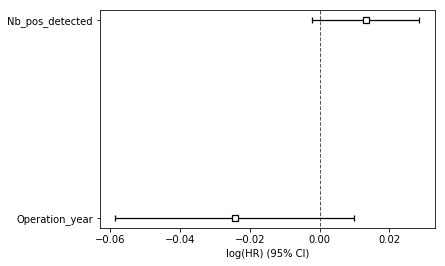

In [18]:
cph.plot()

<div align='justify'><font size=3>The summary statistics above indicates the significance of the covariates in predicting the Survival risk. both features play a tiny significant role in predicting the survival. The large CI indicates that more data are needed.</font></div>

# <div id="chap4">Example of a Survival Curve</div>

In [19]:
## I want to see the Survival curve at the patient level.
## Random patients
patients = [4,125,211]

rows_selected = data.iloc[patients, 1:3]
rows_selected

,Operation_year,Nb_pos_detected
4,65,4
125,64,0
211,67,0


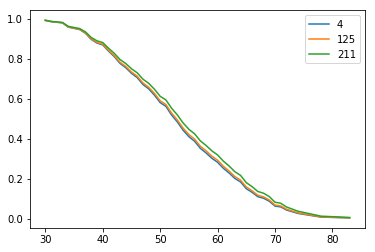

In [20]:
## Lets predict the survival curve for the selected patients. 
## Patients can be identified with the help of the number mentioned against each curve.
cph.predict_survival_function(rows_selected).plot()

<div align='justify'><font size=3>Shows the survival curves at individual level. It shows the survival curves for three randomly selected patients.</font></div>